<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет, Сергей! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом. Он выполнен уже на достойном уровне. Однако есть моменты, которые еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. Если обращение на ты неприемлемо, то прошу сообщить. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках:
    
<div class="alert alert-success">Если фон комментария зелёный - всё сделано правильно. Рекомендации укажу таким же цветом;</div>
        
<div class="alert alert-warning">Оранжевый - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки;</div>
        
<div class="alert alert-danger">Красный - нужно переделать. </div>
        
Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. Свои же комментарии ты можешь обозначать любым заметным способом. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Привет, Артем! Спасибо, что проверил задание:) Я постарался учесть все комментарии и поправить код! Надеюсь, что у меня получилось=)
    
</div>

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

 **Оглавление** <a id='section_0'></a>

1. [Изучение общей информации о файлах с данными](#section_1)
2. [Предобработка данных](#section_2)
  - [Приведем данные в каждой таблице к нужному типу.](#section_2.1)
  - [Подсчет для каждого пользователя](#section_2.2)
    1. [количество сделанных звонков и израсходованных минут разговора по месяцам](#section_2.2.1)
    2. [количество отправленных сообщений по месяцам](#section_2.2.2)
    3. [объем израсходованного интернет-трафика по месяцам](#section_2.2.3)
    4. [объединение данных из таблиц](#section_2.2.4)
3. [Анализ данных](#section_3)
  1. [Анализ тарифа ultra](#section_3.1)
  2. [Анализ тарифа smart](#section_3.2)
4. [Проверка гипотез](#section_4)
  1. [Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются](#section_4.1)
  2. [Cредняя выручка пользователя из Москвы отличается от выручки пользователей из других регионов](#section_4.2)
5. [Общие выводы](#section_5)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Цель работы также хорошо бы вынести в отдельный блок вступления. Стоит также описать те данные, с которыми мы работаем. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Сделано=)
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

👍  

</div>

## . Изучение общей информации о файлах с данными
<a id='section_1'></a>

[Оглавление](#section_0) 

Для удобства просмотра информации написал функцию, которая показывает пропущенные, значения и информацию по столбцам.

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

calls = pd.read_csv('/datasets/calls.csv', parse_dates = ['call_date'])
def info_table(table):
    display(table)
    display(table.isna().sum())
    table.info()    
info_table(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


id           0
call_date    0
duration     0
user_id      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


В таблице звонков нет пропущенных значений, столбец звонков представлен в виде id_номер, нужно убрать id_  и оставить только номер звонка. В столбце минут звонка следует привести тип данных к int с округлением вверх.

In [2]:
internet = pd.read_csv('/datasets/internet.csv', parse_dates = ['session_date'], index_col=0)
info_table(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Задав параметр index_col=0 метода read_csv, мы можем сделать данный столбец 'Unnamed: 0' индексом, коим он и является. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Буду знать=)

</div>

Первый столбец дублирует индекс, его сделали индексом, индентификатор аналогично очистить от приставки id_ и привести к типу данных int, трафик округлить вверх и привести к типу данных int.

In [3]:
messages = pd.read_csv('/datasets/messages.csv', parse_dates=['message_date'])
info_table(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


id              0
message_date    0
user_id         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Столбцы с датой в каждом случае у нас имеют тип данных object. Исправить это уже при считывании данных тебе поможет [данная статья](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e) о исправлении типов данных столбцов с датой уже при считывании таблицы. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Везде поменял=)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Круто, что ты освоил способы устранения ошибок в данных уже на стадии их считывания. 

</div>

Индентификатор аналогично очистить от приставки id_ и привести к типу данных int.

In [4]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
info_table(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Здесь столбец с названием тарифа можно привести к типу данных str.

In [5]:
users = pd.read_csv('/datasets/users.csv', parse_dates=['reg_date', 'churn_date'])
info_table(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В столбце дат churn_date есть пропущенные значения, значит тарифом до момента выгрузки данных еще пользуются. Их можно заменить максимальной датой столбца reg_date, которая скорее всего является ближайшей датой к дате выгрузки данных. Числовые типы данных привести к int, столбец с названием города привести к строчным буквам и типу данных str. Фамилию и имя можно объединить в один столбец.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Подумай также о возможных причинах появления ошибок в данных, а также о том, являются ли они случайными или нет. 

Первый взгляд на таблицы выполнен.

</div>

## Предобработка данных
<a id='section_2'></a>

[Оглавление](#section_0) 

### Приведем данные в каждой таблице к нужному типу. 
<a id='section_2.1'></a>

[Оглавление](#section_0) 

Уберем лишние значения индентификатора звонков и приведем к типу int:

In [6]:
calls['id'] = calls['id'].astype('int').astype('str')
calls['id'] = calls['id'].replace('_', '').str[4:].astype('int')

Округлим минуты вверх и удалим все строки с нулевым значением минут, это скорее всего непринятые звонки или сбой в сети, чтобы они не влияли на данные.

In [7]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls = calls.loc[calls['duration'] != 0]
calls

,id,call_date,duration,user_id
2,2,2018-06-11,3,1000
3,3,2018-09-21,14,1000
4,4,2018-12-15,6,1000
7,7,2018-08-22,19,1000
8,8,2018-09-15,19,1000
...,...,...,...,...
202602,215,2018-12-26,1,1499
202603,216,2018-10-18,19,1499
202604,217,2018-11-10,11,1499
202605,218,2018-10-06,5,1499


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, что округление производится до суммирования. Это согласуется с тем, как оператор фиксирует выручку. Однако изобретать такие методы не стоит. Используй метод np.ceil(). 

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Отлично, такой способ работает эффективнее рукописного округления. 

</div>

Приведем столбец id к типу id, удалив ненужные первые символы, отсылающие к id  совершившего выход в интернет. Также удалим строки с нулевым трафиком, чтобы они не влияли на данные.

In [8]:
internet['id'] = internet['id'].astype('int').astype('str')
internet['id'] = internet['id'].replace('_', '').str[4:].astype('int')
internet = internet.loc[internet['mb_used'] != 0]
internet


,id,mb_used,session_date,user_id
0,0,112.95,2018-11-25,1000
1,1,1052.81,2018-09-07,1000
2,2,1197.26,2018-06-25,1000
3,3,550.27,2018-08-22,1000
4,4,302.56,2018-09-24,1000
...,...,...,...,...
149390,151,752.72,2018-10-11,1499
149391,152,318.90,2018-10-03,1499
149392,153,490.13,2018-12-14,1499
149394,155,1246.32,2018-11-26,1499


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Округлять трафик не стоит. Оператор это делает после расчета месячных показателей. Тем более не следует округлять до ГБ. Иначе любая сессия хоть в 1 Кб станет размером в 1 ГБ.

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Перенес округление на этап, когда посчитал по месцам использованный трафик.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Верное решение!
</div>

Приведем id  в порядок по аналогии с предыдущими таблицами.

In [9]:
messages['id'] = messages['id'].astype('int').astype('str')
messages['id'] = messages['id'].replace('_', '').str[4:].astype('int')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


Удалим столбцы имени и фамилии, т.к. данная информация для расчетов не нужна.

In [10]:
users = users.drop(columns = ['first_name', 'last_name'])
users

,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,NaT,Краснодар,2018-05-25,ultra
1,1001,41,NaT,Москва,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,2018-06-17,smart
3,1003,23,NaT,Москва,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,2018-05-14,ultra
...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,2018-08-28,ultra
496,1496,36,NaT,Вологда,2018-01-27,smart
497,1497,32,NaT,Челябинск,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,2018-07-19,smart


Посмотрим максимальную дату и минимальную по регистрации: видим, что все значения внутри одного года, нет смысла сортировать месяцы по ггодам, также можем заполнить отсутствующие значения в столбце ухода с тарифа максимальной датой (датой последней выгрузки данных), чтобы изменить тип данных в данном столбце корректно и получить красивую таблицу.

In [11]:
max_reg = max(users['reg_date'])
max_reg

Timestamp('2018-12-31 00:00:00')

In [12]:
min(users['reg_date'])

Timestamp('2018-01-01 00:00:00')

In [13]:
users['churn_date']  = users['churn_date'].fillna(max_reg)
users['city'] = users['city'].str.lower()
users['tariff'] = users['tariff'].astype('category')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null category
dtypes: category(1), datetime64[ns](2), int64(2), object(1)
memory usage: 20.2+ KB


С тарифами поступим следующим образом: переименуем столбец тарифов по аналогии с таблицей пользователей, чтобы моно было объединить по нему, пересчитаем столбец мб в месц на гб, опять же для удобства сравнения и счета, ну и переименуем его в гб, чтобы не путаться.

In [14]:
tariffs['tariff_name'] = tariffs['tariff_name'].astype('category')
tariffs.rename(columns = {'tariff_name':'tariff'},inplace=True)
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'].astype('int')/1024
tariffs.rename(columns = {'mb_per_month_included':'gb_per_month_included'},inplace=True)
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
gb_per_month_included    2 non-null float64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null category
dtypes: category(1), float64(1), int64(6)
memory usage: 338.0 bytes


Все типы на текущий момент меня устраивают, перехожу к дополнению данных.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

В таблицах со звонками и интернет-трафиком есть большое число нулевых значений в продолжительности звонков/интернет-сессиях. Какова возможная причина их появления - недозвоны, сбои сети или что-то другое? Подумай над причинами их появления, исходя из которой обработай их.

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Строки с нулевыми значениями удалил, чтобы они не влияли на данные, т.к. это скорее всего недозвоны или сбои сети.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Хорошо бы их проанализировать детальнее. С причинами их появления согласен. 

</div>

### Подсчет для каждого пользователя:
<a id='section_2.2'></a>

[Оглавление](#section_0) 

#### количество сделанных звонков и израсходованных минут разговора по месяцам 
<a id='section_2.2.1'></a>

[Оглавление](#section_0) 

Посчитаем по заданию через группировку и сохраним таблицу (правда количество звонков не понятно зачем для подсчета, но босс попросил, я сделал):

In [15]:
calls['month'] = calls['call_date'].dt.month
calls_sum_id = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = {'count', 'sum'})
calls_sum_id

count  sum
user_id month            
1000    5         17  159
        6         28  172
        7         41  340
        8         42  408
        9         46  466
...              ...  ...
1498    10        30  247
1499    9          8   70
        10        44  449
        11        62  612
        12        56  492

[3168 rows x 2 columns]

#### количество отправленных сообщений по месяцам
<a id='section_2.2.2'></a>

[Оглавление](#section_0) 

По аналогии посчитаем сообщения и сохраним в таблицу.

In [16]:
messages['month'] = messages['message_date'].dt.month
messages_sum_id = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = {'count'})
messages_sum_id

count
user_id month       
1000    5         22
        6         60
        7         75
        8         81
        9         57
...              ...
1498    10        42
1499    9         11
        10        48
        11        59
        12        66

[2717 rows x 1 columns]

#### объем израсходованного интернет-трафика по месяцам;
<a id='section_2.2.3'></a>

[Оглавление](#section_0) 

Ну и с интернетом аналогично и теперь мы можем округлить вверх значение трафика переведя в гб.

In [17]:
internet['month'] = internet['session_date'].dt.month
internet_sum_id = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = {'sum'})
internet_sum_id['sum'] = np.ceil(internet_sum_id['sum']/1024).astype('int')
internet_sum_id

sum
user_id month     
1000    5        3
        6       23
        7       14
        8       14
        9       15
...            ...
1498    10      21
1499    9        2
        10      18
        11      18
        12      13

[3201 rows x 1 columns]

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Помесячные показатели рассчитаны. Данные подготовлены к дальнейшим расчетам.

</div>

#### объединение данных из таблиц
<a id='section_2.2.4'></a>

[Оглавление](#section_0) 

Для удобства объединим все таблицы в одну, чтобы после посчитать выручку. Начнем с объединения звонков и сообщений.

In [18]:
cal_mes = calls_sum_id.join(messages_sum_id, lsuffix= '_calls', rsuffix='_messages')
cal_mes

count_calls  sum  count_messages
user_id month                                  
1000    5               17  159            22.0
        6               28  172            60.0
        7               41  340            75.0
        8               42  408            81.0
        9               46  466            57.0
...                    ...  ...             ...
1498    10              30  247            42.0
1499    9                8   70            11.0
        10              44  449            48.0
        11              62  612            59.0
        12              56  492            66.0

[3168 rows x 3 columns]

Далее объединим таблицу с интернетом.

In [19]:
total = cal_mes.join(internet_sum_id, lsuffix = '_calls', rsuffix='_internet')
total.reset_index(inplace=True)
total

,user_id,month,count_calls,sum_calls,count_messages,sum_internet
0,1000,5,17,159,22.0,3.0
1,1000,6,28,172,60.0,23.0
2,1000,7,41,340,75.0,14.0
3,1000,8,42,408,81.0,14.0
4,1000,9,46,466,57.0,15.0
...,...,...,...,...,...,...
3163,1498,10,30,247,42.0,21.0
3164,1499,9,8,70,11.0,2.0
3165,1499,10,44,449,48.0,18.0
3166,1499,11,62,612,59.0,18.0


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, именно такое соединение нам и нужно в данном случае. Иначе в таблицу не попадут клиенты, которые не пользовались одним из видов услуг оператора в течение конкретного месяца. 

</div>

Объединим с пользователями и поправим по ходу пьесы типы данных, ну и конечно нан заменим на нули? потому что абонент скорее всего пользовался в течение конкретного месяца данной опцией из тарифа, а использовал другие (к примеру пользовался только интернетом или не мог пользоваться интерентом, т.к. был в роуминге).

In [20]:
user_total = total.merge(users, on='user_id', how='left')
user_total['tariff'] = user_total['tariff'].astype('category')
user_total['count_messages'] = user_total['count_messages'].fillna(0).astype('int')
user_total['sum_internet'] = user_total['sum_internet'].fillna(0).astype('int')
user_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 11 columns):
user_id           3168 non-null int64
month             3168 non-null int64
count_calls       3168 non-null int64
sum_calls         3168 non-null int64
count_messages    3168 non-null int64
sum_internet      3168 non-null int64
age               3168 non-null int64
churn_date        3168 non-null datetime64[ns]
city              3168 non-null object
reg_date          3168 non-null datetime64[ns]
tariff            3168 non-null category
dtypes: category(1), datetime64[ns](2), int64(7), object(1)
memory usage: 275.4+ KB


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Почему пропуски следует заполнить нулями?

</div>

Добавим данные по тарифу:

In [21]:
user_total_tariffs = user_total.merge(tariffs, on = 'tariff')
user_total_tariffs['gb_per_month_included'] = user_total_tariffs['gb_per_month_included'].astype('int')
user_total_tariffs['city'] = user_total_tariffs['city'].astype('category')
user_total_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 18 columns):
user_id                  3168 non-null int64
month                    3168 non-null int64
count_calls              3168 non-null int64
sum_calls                3168 non-null int64
count_messages           3168 non-null int64
sum_internet             3168 non-null int64
age                      3168 non-null int64
churn_date               3168 non-null datetime64[ns]
city                     3168 non-null category
reg_date                 3168 non-null datetime64[ns]
tariff                   3168 non-null category
messages_included        3168 non-null int64
gb_per_month_included    3168 non-null int64
minutes_included         3168 non-null int64
rub_monthly_fee          3168 non-null int64
rub_per_gb               3168 non-null int64
rub_per_message          3168 non-null int64
rub_per_minute           3168 non-null int64
dtypes: category(2), datetime64[ns](2), int64(14)
memory us

Теперь проверим на наличие дубликатов на скякий случай:

In [22]:
user_total_tariffs.duplicated().sum()

0

Дубликатов нет, едем дальше.

Посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану). Для этого создаем новый столбец revenue.

In [23]:
def rev(row):
    sum_calls = row['sum_calls']
    count_messages = row['count_messages']
    sum_internet = row['sum_internet']
    messages_included = row['messages_included']
    gb_per_month_included = row['gb_per_month_included']
    minutes_included = row['minutes_included']
    rub_monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    if sum_calls > minutes_included:
        calls_fee = (sum_calls-minutes_included)*rub_per_minute
    else:
        calls_fee = 0
    if count_messages > messages_included:
        messages_fee = (count_messages-messages_included)*rub_per_message
    else:
        messages_fee = 0
    if sum_internet > gb_per_month_included:
        internet_fee = (sum_internet-gb_per_month_included)*rub_per_gb
    else:
        internet_fee = 0
    revenue = rub_monthly_fee + calls_fee + messages_fee + internet_fee
    return revenue
user_total_tariffs['revenue'] = user_total_tariffs.apply(rev, axis=1)

Проверим, что получилось:

In [24]:
user_total_tariffs

,user_id,month,count_calls,sum_calls,count_messages,sum_internet,age,churn_date,city,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,17,159,22,3,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
1,1000,6,28,172,60,23,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
2,1000,7,41,340,75,14,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
3,1000,8,42,408,81,14,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
4,1000,9,46,466,57,15,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,1498,10,30,247,42,21,68,2018-10-25,владикавказ,2018-07-19,smart,50,15,500,550,200,3,3,1750
3164,1499,9,8,70,11,2,35,2018-12-31,пермь,2018-09-27,smart,50,15,500,550,200,3,3,550
3165,1499,10,44,449,48,18,35,2018-12-31,пермь,2018-09-27,smart,50,15,500,550,200,3,3,1150
3166,1499,11,62,612,59,18,35,2018-12-31,пермь,2018-09-27,smart,50,15,500,550,200,3,3,1513


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Финальная таблица получена верным образом. Стоит убрать из нее излишнюю информацию в виде имени или фамилии клиента. Такая информация никак не поможет нам в анализе, поэтому хранить ее повторно не стоит. Информация о тарифах у нас уже есть в таблице tariffs. Дублировать ее не стоит.  

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Лишнюю информацию убрал, но отделять информацию о тарифе не стал, чтобы не переписывать формулу. В следующий раз так и сделаю.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Ок)

</div>

##  Анализ данных
<a id='section_3'></a>

[Оглавление](#section_0) 

Опишим поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишим распределения. Для начала напишем функцию для удобства.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Импорт необходимых библиотек следует производить в первой ячейке работы, как то рекомендует стандарт. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Перенес в начало.

</div>

In [25]:
def analize(chek, name_x):
    display('Среднее равно',chek.mean())
    var_chek = np.var(chek)
    display('Дисперсия равна',var_chek)
    display('Стандартное отклонение равно',np.sqrt(var_chek))
    chek.hist()
    pl.title('Распределение')
    pl.xlabel(name_x)
    pl.ylabel("Количество наблюдений")

### Анализ тарифа ultra
<a id='section_3.1'></a>

[Оглавление](#section_0) 

Создадим срез по тарифу Ультра и посмотрим показатели с помощью функции:

'Среднее равно'

547.7550158394931

'Дисперсия равна'

93239.86606512647

'Стандартное отклонение равно'

305.35203628783364

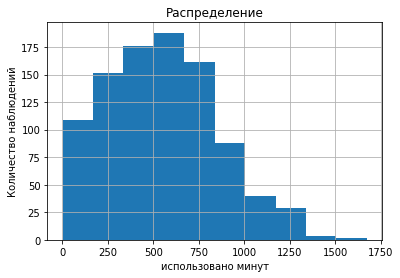

In [26]:
user_total_ultra = user_total_tariffs.query('tariff == "ultra"')
analize(user_total_ultra['sum_calls'], 'использовано минут')

Из распределения видно, что в среднем абонентам нужно 545 минут в месяц, большая часть значений лежит от 0 до 547+3умн305=1462 минут. Распределение близко к нормальному, но скошено вправо. При этом 3000 минут абоненты не используют, можно снизить лимит до 1500, чтобы те немногочисленные пользователи опции дополнительно платили за опцию, большинство останется при тех же условиях, а компания получит дополнительную прибыль.

'Среднее равно'

48.75923970432946

'Дисперсия равна'

2169.4330587672516

'Стандартное отклонение равно'

46.577173151311484

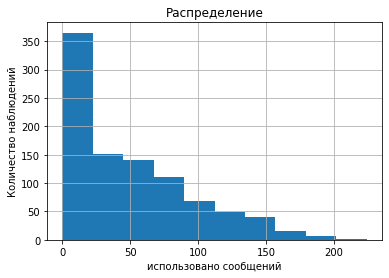

In [27]:
analize(user_total_ultra['count_messages'], 'использовано сообщений')

Из распределения видно, что в среднем абонентам нужно 49 сообщений в месяц, большая часть значений лежит от 0 до 49+3умн47=190 сообщений. Распределение близко к распределению Пуассона. При этом 1000 сообщений абоненты не используют, можно снизить лимит до 200, чтобы те немногочисленные пользователи опции дополнительно платили за опцию, большинство останется при тех же условиях, а компания получит дополнительную прибыль.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Будет здорово, если все стат. показатели ты соберешь в единую таблицу. Так нам будет заметно проще сравнивать тарифы между собой. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Добавил ниже.

</div>

'Среднее равно'

19.497360084477297

'Дисперсия равна'

97.72412185872354

'Стандартное отклонение равно'

9.885551166157784

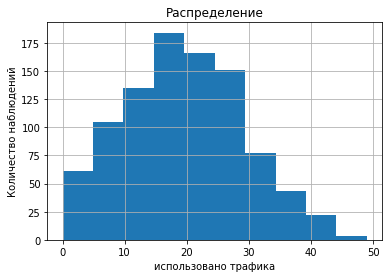

In [28]:
analize(user_total_ultra['sum_internet'], 'использовано трафика')

Из распределения видно, что в среднем абонентам нужно 19 гб в месяц, большая часть значений лежит от 0 до 19+3умн10=49 гб. Распределение близко к нормальному, но скошено вправо. При этом 30 гб абоненты не используют, можно уменьшить лимит до 20, при этом те кто выше среднего продолжат оплачивать перерасход, что увеличит выручку.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

По каждому графику проекта проверь подписи осей и названия рисунков. Без этого порой сложно понять, что именно мы анализируем. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Подписал.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Не забывай про данные важные элементы любой визуализации. 

</div>

### Анализ тарифа smart
<a id='section_3.2'></a>

[Оглавление](#section_0) 

In [29]:
def analize_2(chek_1, chek_2, name_x):
    display('Среднее равно',chek_1.mean())
    var_chek = np.var(chek_1)
    display('Дисперсия равна',var_chek)
    display('Стандартное отклонение равно',np.sqrt(var_chek))
    chek_1.hist()
    chek_2.hist()
    pl.title('Распределение по двум тарифам, smart - синий')
    pl.xlabel(name_x)
    pl.ylabel("Количество наблюдений")
    

Теперь создадим срез по тарифу Смарт и посмотрим показатели с помощью функции, оранжевым цветом указан второй тариф по даному показателю:

'Среднее равно'

419.4403421882035

'Дисперсия равна'

35702.04653099502

'Стандартное отклонение равно'

188.9498518946099

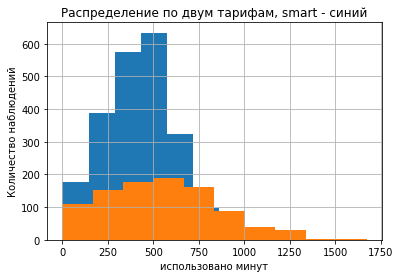

In [30]:
user_total_smart = user_total_tariffs.query('tariff == "smart"')
analize_2(user_total_smart['sum_calls'],user_total_ultra['sum_calls'], 'использовано минут')

Из распределения видно, что в среднем абонентам нужно 419 минут в месяц, большая часть значений лежит от 0 до 419+3умн189=986 минут. Распределение близко к нормальному. При этом 500 минут абоненты не используют в большей половине, лимит следует сохранить, т.к. достаточно много пользователей не укладываются в лимит и это приносит компании дополнительный доход.

'Среднее равно'

33.392165691130124

'Дисперсия равна'

798.8462060707005

'Стандартное отклонение равно'

28.26386750023253

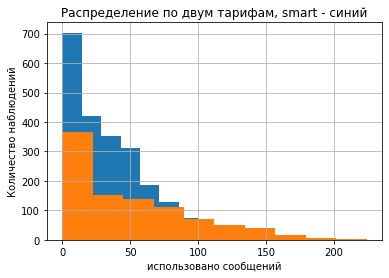

In [31]:
analize_2(user_total_smart['count_messages'],user_total_ultra['count_messages'], 'использовано сообщений')

Из распределения видно, что в среднем абонентам нужно 33 сообщения в месяц, большая часть значений лежит от 0 до 33+3умн28=117 сообщений. Распределение близко к распределению Пуассона. При этом 50 сообщений абоненты не используют, можно снизить лимит до 40, чтобы пользователи опции дополнительно платили за опцию, большинство останется при тех же условиях, а компания получит дополнительную прибыль.

'Среднее равно'

16.331382260243135

'Дисперсия равна'

33.07703856661912

'Стандартное отклонение равно'

5.751264084235666

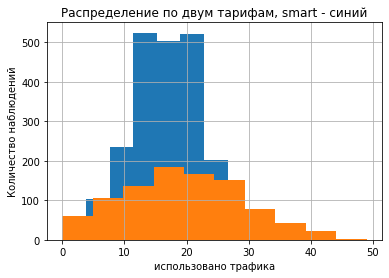

In [32]:
analize_2(user_total_smart['sum_internet'],user_total_ultra['sum_internet'], 'использовано трафика')

Из распределения видно, что в среднем абонентам нужно 16 гб в месяц, большая часть значений лежит от 0 до 16+3умн5=31 гб. Распределение близко к нормальному. При этом 15 гб абоненты используют, и с серьезным перевесом уходят в дополнительные траты по этой опции, можно увеличить лимит до 20, чтобы привлечь больше пользователей, при этом те кто выше среднего продолжат оплачивать перерасход, а вновь привлеченные компенсируют сдвиг по лимитам в выручке и это даст больший прирост чем в тарифе Ультра. Это связано как с большим перерасходом трафика, так и со стоимостью 1 гб.

In [33]:
def stat(col_stat):
    var_col=np.var(col_stat)
    stat_table = [col_stat.mean(), var_col, np.sqrt(var_col)]
    return stat_table

calls_stat_ultra = stat(user_total_ultra['sum_calls'])
messages_stat_ultra = stat(user_total_ultra['count_messages'])
internet_stat_ultra = stat(user_total_ultra['sum_internet'])
calls_stat_smart = stat(user_total_smart['sum_calls'])
messages_stat_smart = stat(user_total_smart['count_messages'])
internet_stat_smart = stat(user_total_smart['sum_internet'])
data = {
    'показатель':['среднее','дисперсия','стандартное отклонение'],
    'calls_utra':calls_stat_ultra,
    'calls_smart':calls_stat_smart,
    'messages_ultra':messages_stat_ultra,
    'messages_smart':messages_stat_smart,
    'internet_ultra':internet_stat_ultra,
    'internet_smart':internet_stat_smart
       }
stat_tariff = pd.DataFrame(data)
stat_tariff.set_index('показатель', inplace=True)
stat_tariff

,calls_utra,calls_smart,messages_ultra,messages_smart,internet_ultra,internet_smart
показатель,,,,,,
среднее,547.755016,419.440342,48.759240,33.392166,19.497360,16.331382
дисперсия,93239.866065,35702.046531,2169.433059,798.846206,97.724122,33.077039
стандартное отклонение,305.352036,188.949852,46.577173,28.263868,9.885551,5.751264


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Базовые статистические параметры получены. Приведены все необходимые графики. Графики для одинаковых услуг тарифов лучше привести на одном рисунке. Так удобнее будет сравнивать тарифы. Также можно привести график по выручке компании с разбиением по тарифу. 

</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Привел.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Отлично, помарки данного раздела исправлены. Такое сравнение тарифов позволяет детальнее их проанализировать и найти особенности каждого из них.

</div>

## Проверка гипотез
<a id='section_4'></a>

[Оглавление](#section_0) 

Перед проверкой гипотез посмотрим на распределения по искомым значениям.

'Среднее равно'

2071.4889123548046

'Дисперсия равна'

144356.07247474097

'Стандартное отклонение равно'

379.94219622824335

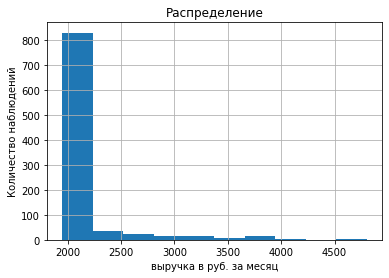

In [34]:
analize(user_total_ultra['revenue'], 'выручка в руб. за месяц')

Распределение Пуассона, средняя выручка 2071. Сильный пик у среднего.

In [35]:
def analize_3(chek_1, chek_2, name_x):
    display('Среднее равно',chek_1.mean())
    var_chek = np.var(chek_1)
    display('Дисперсия равна',var_chek)
    display('Стандартное отклонение равно',np.sqrt(var_chek))
    chek_1.hist()
    chek_2.hist()
    pl.title('Распределение выручки по Москве и регионам, регионы - синий')
    pl.xlabel(name_x)
    pl.ylabel("Количество наблюдений")

'Среднее равно'

1291.108059432688

'Дисперсия равна'

670982.004532074

'Стандартное отклонение равно'

819.134912289834

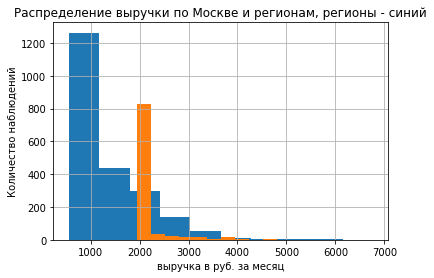

In [36]:
analize_3(user_total_smart['revenue'],user_total_ultra['revenue'],'выручка в руб. за месяц')

Распределение ближе к нормальному, средняя выручка 1291. Стандартное отклонение выше, чем у предыдущего тарифа, проверим гипотезу, что первый тариф интересней для компании.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

6000 на услуги оператора в месяц выглядят как-то подозрительно. Исправь помарку при округлении трафика, тогда значения должны быть заметно реалистичнее. 

</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Скорректировал данные.

</div>

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются 
<a id='section_4.1'></a>

[Оглавление](#section_0) 

За нулевую гипотезу берем, что средняя выручка тарифа "Ультра" и тарифа "Смарт" равны. Альтернативная - различаются.

In [37]:
from scipy import stats as st

alpha = .05
results = st.ttest_ind(user_total_ultra['revenue'], user_total_smart['revenue'])
display('p-значение: ', results.pvalue)
if results.pvalue > alpha:
    display('Нулевая гипотеза верна')
else:
    display('Отвергаем нулевую гипотезу, выручки различаются')

'p-значение: '

8.145017201938894e-155

'Отвергаем нулевую гипотезу, выручки различаются'

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Формулировка не соответствует проводимому тесту. Нас просят провести именно двусторонний тест, нам не важно, какой из тарифов имеет большее среднее. Важно лишь то, что они будут различаться. Скорректируй формулировки. 

</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Скорректировал формулировки.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Да, все правильно. Именно двусторонняя формулировка для альтернативной гипотезы нам и нужна. 

</div>

### Cредняя выручка пользователя из Москвы отличается от выручки пользователей из других регионов.
<a id='section_4.2'></a>

[Оглавление](#section_0) 

'Среднее равно'

1546.0524590163934

'Дисперсия равна'

565369.4070841172

'Стандартное отклонение равно'

751.910504703929

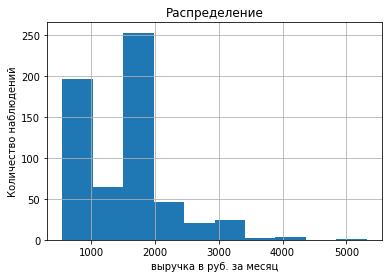

In [38]:
user_total_moscow = user_total_tariffs.query('city == "москва"')
analize(user_total_moscow['revenue'], 'выручка в руб. за месяц')

Также проверим распределения перед проверкой гипотезы: похоже на нормальное. Среднее в Москве 1546 руб.

'Среднее равно'

1519.217748240813

'Дисперсия равна'

659127.236010254

'Стандартное отклонение равно'

811.8665136648106

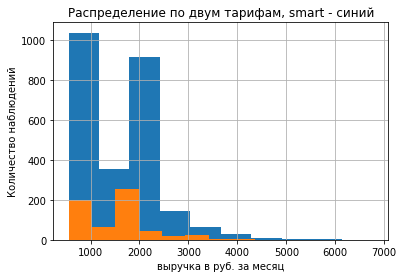

In [39]:
user_total_not_moscow = user_total_tariffs.query('city != "москва"')
analize_2(user_total_not_moscow['revenue'],user_total_moscow['revenue'],'выручка в руб. за месяц')

В регионах по форме графика похоже, но по значениям среднее 1519 и среднее отклонение выше не значительно. Проверим нулевую гипотезу, что средняя выручка в Москве и регионах равны, а альтернативная - различаются:

In [40]:
results_city = st.ttest_ind(user_total_moscow['revenue'], user_total_not_moscow['revenue'])
display('p-значение: ', results_city.pvalue)
if results_city.pvalue > alpha:
    display('Нулевая гипотеза верна')
else:
    display('Отвергаем нулевую гипотезу')

'p-значение: '

0.45718519583645034

'Нулевая гипотеза верна'

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ситуация аналогична, скорректируй формулироку гипотез. Мы проводим двусторонний тест. 

</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Также скорректировал.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Также теперь формулировка верна. 

</div>

## Общие выводы
<a id='section_5'></a>

[Оглавление](#section_0) 

1. В ходе исследования выявлено для тарифа Ультра, что в среднем абонентам нужно 545 минут в месяц, большая часть значений лежит от 0 до 1462 минут. Распределение близко к нормальному, но скошено вправо. При этом 3000 минут абоненты не используют, можно снизить лимит до 1500, чтобы те немногочисленные пользователи опции дополнительно платили за опцию, большинство останется при тех же условиях, а компания получит дополнительную прибыль.
2. В ходе исследования выявлено для тарифа Ультра, что в среднем абонентам нужно 49 сообщений в месяц, большая часть значений лежит от 0 до 190 сообщений. Распределение близко к распределению Пуассона. При этом 1000 сообщений абоненты не используют, можно снизить лимит до 200, чтобы те немногочисленные пользователи опции дополнительно платили за опцию, большинство останется при тех же условиях, а компания получит дополнительную прибыль.
3. Из распределения видно, что в среднем абонентам нужно 19 гб в месяц, большая часть значений лежит от 0 до 19+3умн10=49 гб. Распределение близко к нормальному, но скошено вправо. При этом 30 гб абоненты не используют, можно уменьшить лимит до 20, при этом те кто выше среднего продолжат оплачивать перерасход, что увеличит выручку.
4. В ходе исследования выявлено для тарифа Смарт, что в среднем абонентам нужно 419 минут в месяц, большая часть значений лежит от 0 до 986 минут. Распределение близко к нормальному. При этом 500 минут абоненты не используют в большей половине, лимит следует сохранить, т.к. достаточно много пользователей не укладываются в лимит и это приносит компании дополнительный доход.
5. В ходе исследования выявлено для тарифа Смарт, что в среднем абонентам нужно 33 сообщения в месяц, большая часть значений лежит от 0 до 117 сообщений. Распределение близко к распределению Пуассона. При этом 50 сообщений абоненты не используют, можно снизить лимит до 40, чтобы пользователи опции дополнительно платили за опцию, большинство останется при тех же условиях, а компания получит дополнительную прибыль.
6. Из распределения видно, что в среднем абонентам нужно 16 гб в месяц, большая часть значений лежит от 0 до 16+3умн5=31 гб. Распределение близко к нормальному. При этом 15 гб абоненты используют, и с серьезным перевесом уходят в дополнительные траты по этой опции, можно увеличить лимит до 20, чтобы привлечь больше пользователей, при этом те кто выше среднего продолжат оплачивать перерасход, а вновь привлеченные компенсируют сдвиг по лимитам в выручке и это даст больший прирост чем в тарифе Ультра. Это связано как с большим перерасходом трафика, так и со стоимостью 1 гб.
7. За нулевую гипотезу брали, что средняя выручка тарифа "Ультра" и тарифа "Смарт" равны. Альтернативная - различаются. По итогу нулевая гипотеза была отвергнута, поэтому для оператора рекомендуется выбрать тариф Ультра, как более коммерчески выгодный и сбольшей средней выручкой.
8. В регионах по форме графика похоже распределение. Проверили нулевую гипотезу, что средняя выручка в Москве и регионах равны, а альтернативная - различаются. В итоге нулевая гипотеза подтверилась: распределение не зависит от региона.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод. Скорректируй выводы после исправления помарок выше. 

</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий студента - 1</b></font>

Скорректировал.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Увидел, выводы скорректированы. Соглашусь, ультра более выгоден для оператора. Можно написать рекомендации после проведенного анализа, в которых сделаем акцент на продвижении указанного тарифа. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Критических замечаний немного. Однако с ними важно поработать и их исправить. Также есть достаточное число желтых комментариев. Думаю, ты справишься со всеми помарками. Жду твою работу :)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Помарки исправлены, и теперь работа выполнена хорошо. Ты здорово поработал, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Спасибо за оставленные комментарии по исправлениям. Успехов в дальнейшем пути :)

</div>